# Importing libraries and dataset

In [58]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler


In [59]:
train_df = pd.read_csv('train.csv')

In [60]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA and Cleaning

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## we found that age have some nulls so we filled then using median and cabin about 75% of it is null so we dropped it and 2 values only is null in Embarked so we dropped them 

In [63]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [64]:
train_df.drop('Cabin', axis=1, inplace=True)

In [65]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [66]:
train_df.describe(include='O')

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


In [68]:
train_df.dropna(subset=['Embarked'], inplace=True)

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## some visualiaztions so that we find any relations between features

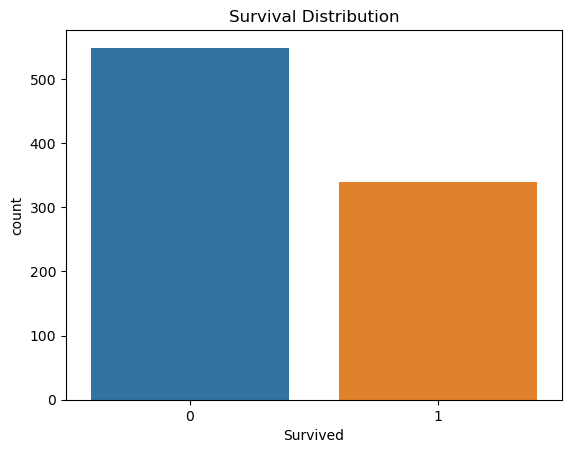

E:\ANA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


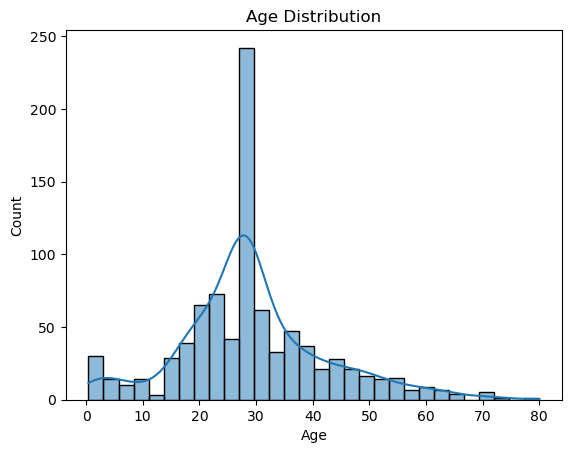

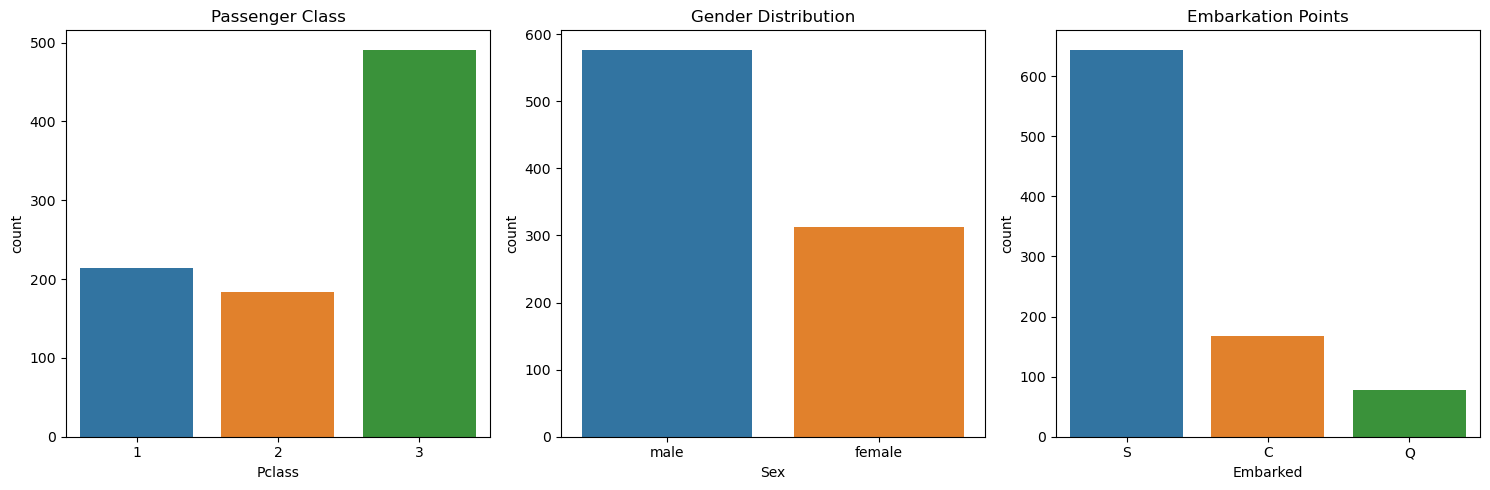

In [70]:
# Univariate analysis of target variable
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Distribution")
plt.show()

# Distribution of Age
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Countplot for categorical variables
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=train_df, x='Pclass', ax=ax[0])
sns.countplot(data=train_df, x='Sex', ax=ax[1])
sns.countplot(data=train_df, x='Embarked', ax=ax[2])

ax[0].set_title("Passenger Class")
ax[1].set_title("Gender Distribution")
ax[2].set_title("Embarkation Points")

plt.tight_layout()
plt.show()

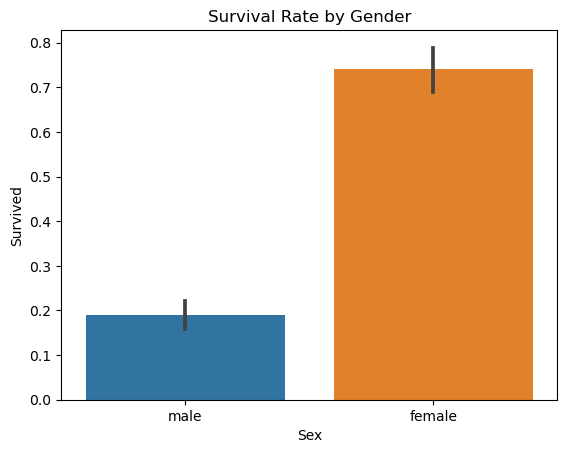

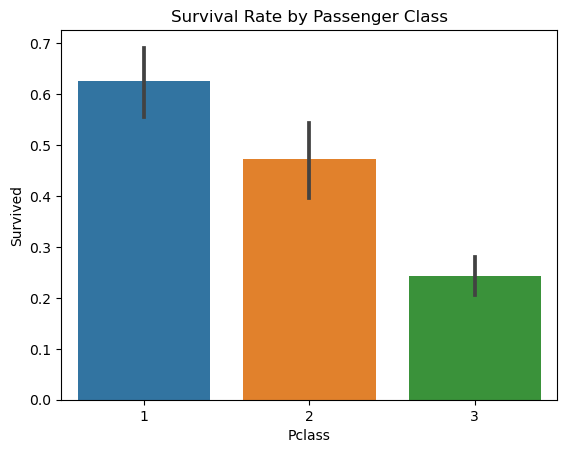

E:\ANA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


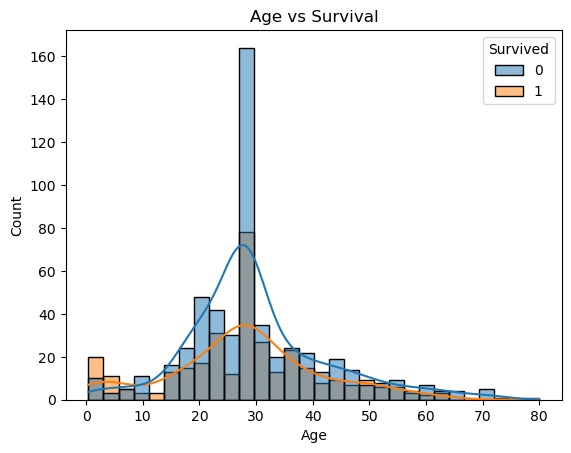

In [71]:
# Survival by Gender
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title("Survival Rate by Gender")
plt.show()

# Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age vs. Survival
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age vs Survival")
plt.show()


## We made manual encoding so that we can use them in our models

In [72]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [73]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1


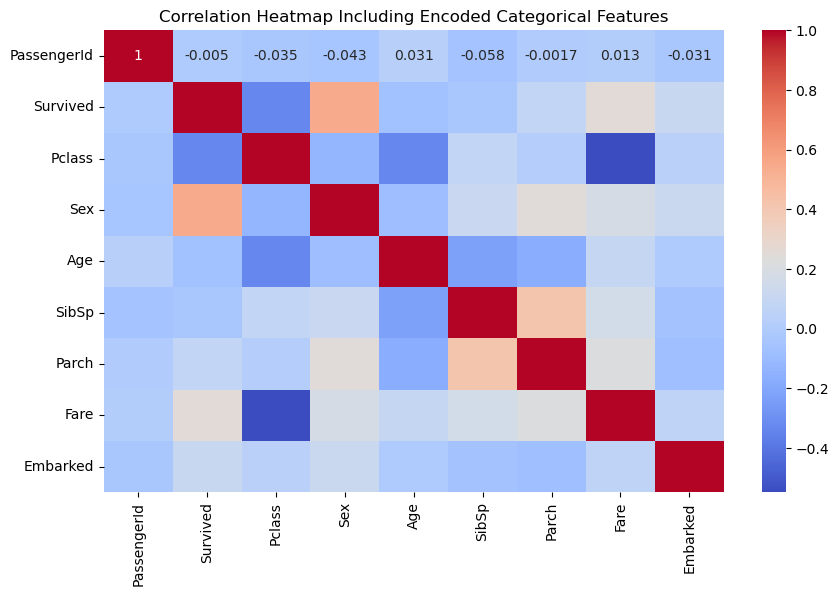

In [74]:
numeric_df = train_df.drop(columns=['Name', 'Ticket'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Including Encoded Categorical Features")
plt.show()

In [75]:
numeric_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.031319,-0.057686,-0.001657,0.012703,-0.030555
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.069822,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.336512,0.081656,0.016824,-0.548193,0.043835
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.086506,0.116348,0.247508,0.179958,0.118593
Age,0.031319,-0.069822,-0.336512,-0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.007165
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.232543,1.000000,0.414542,0.160887,-0.060606
Parch,-0.001657,0.083151,0.016824,0.247508,-0.171485,0.414542,1.000000,0.217532,-0.079320
Fare,0.012703,0.255290,-0.548193,0.179958,0.093707,0.160887,0.217532,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,-0.007165,-0.060606,-0.079320,0.063462,1.000000


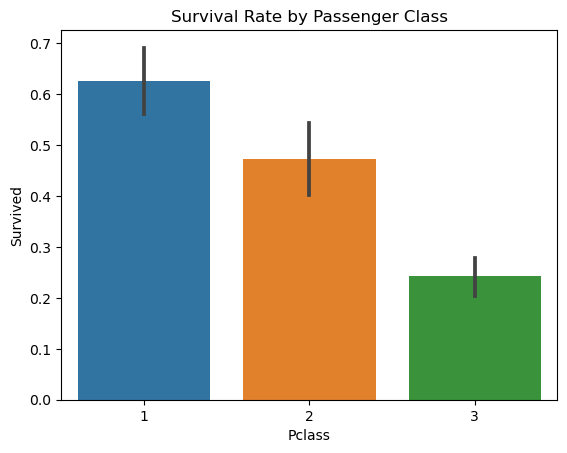

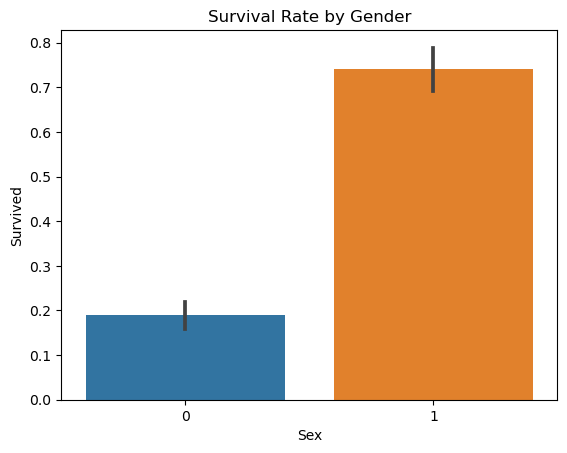

E:\ANA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


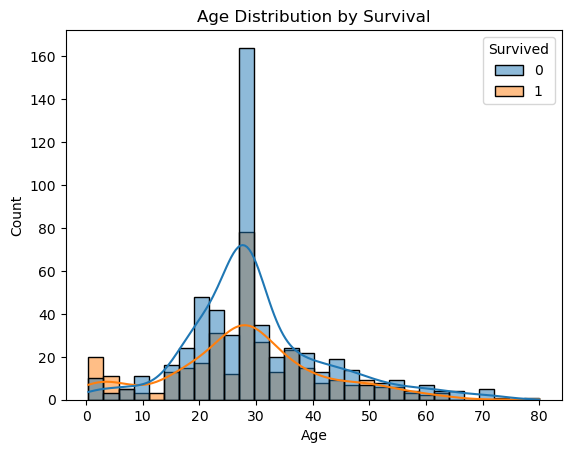

E:\ANA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


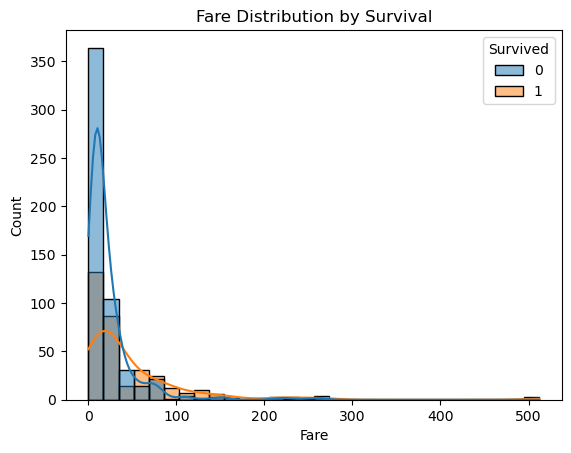

In [76]:

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Survival Rate by Passenger Class")
plt.show()


sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title("Survival Rate by Gender")
plt.show()

sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()

sns.histplot(data=train_df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Fare Distribution by Survival")
plt.show()


### We found outliers we deleted them manually bacause the other outliers because the difference of classes on titanic

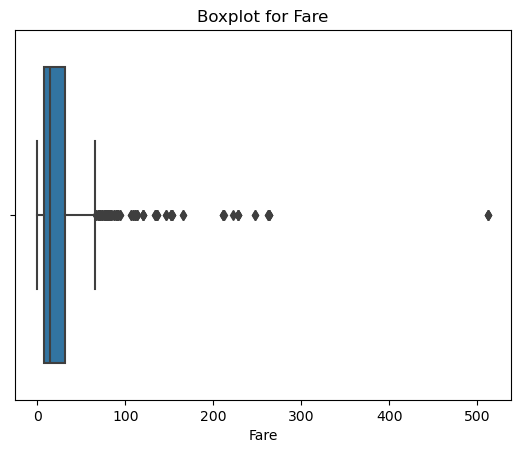

In [77]:
# Boxplot for Fare
sns.boxplot(x=train_df['Fare'])
plt.title("Boxplot for Fare")
plt.show()

In [78]:
train_df.loc[train_df['Fare'].idxmax()]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                           1
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Embarked                      1
Name: 258, dtype: object

In [79]:
train_df = train_df[train_df['Fare'] <= 300]
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1


In [80]:
highest_20_fares = train_df.nlargest(20, 'Fare')
highest_20_fares

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,0
88,89,1,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.0000,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0000,0
438,439,0,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0000,0
311,312,1,1,"Ryerson, Miss. Emily Borie",1,18.0,2,2,PC 17608,262.3750,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",1,21.0,2,2,PC 17608,262.3750,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",0,24.0,0,1,PC 17558,247.5208,1
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,50.0,0,1,PC 17558,247.5208,1
380,381,1,1,"Bidois, Miss. Rosalie",1,42.0,0,0,PC 17757,227.5250,1
557,558,0,1,"Robbins, Mr. Victor",0,28.0,0,0,PC 17757,227.5250,1


# started to drop not needed features and spliting the data into train and test and x and y

In [81]:
# Drop columns not needed for model
X = train_df.drop(['Survived', 'Name', 'Ticket'], axis=1)

# Target variable
y = train_df['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## we used grid_search so that we can test different parameters and search for the best one of them

In [82]:
param_grid = {
    'n_neighbors': range(1, 10),  
    'metric': ['euclidean', 'manhattan', 'minkowski'], 
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [83]:
best_params

{'metric': 'manhattan', 'n_neighbors': 8}

### {'metric': 'manhattan', 'n_neighbors': 8}

In [84]:
best_score

0.8305663769853162

Best KNN Model Performance (k=8):
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       106
           1       0.77      0.65      0.71        72

    accuracy                           0.78       178
   macro avg       0.78      0.76      0.77       178
weighted avg       0.78      0.78      0.78       178



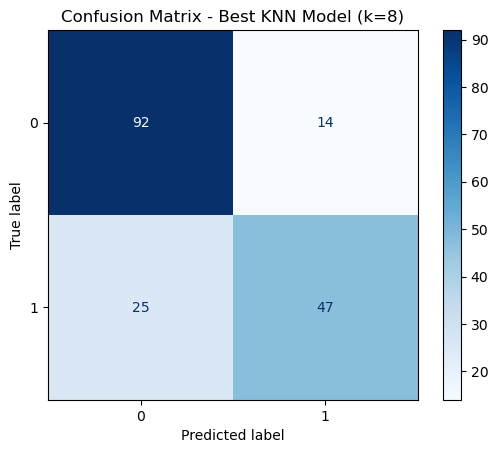

In [85]:
# Use the best estimator from GridSearchCV
best_knn = grid_search.best_estimator_

# Predict on the test set
y_pred_best = best_knn.predict(X_test)

print(f"Best KNN Model Performance (k={best_params['n_neighbors']}):")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - Best KNN Model (k={best_params['n_neighbors']})")
plt.show()

### accuracy: 0.78

GaussianNB Performance:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       106
           1       0.69      0.72      0.71        72

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



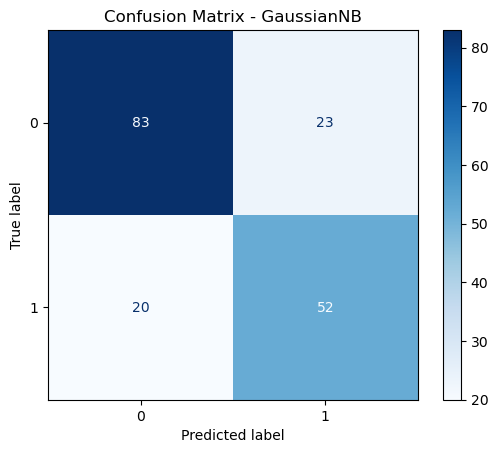

In [90]:
def evaluate_naive_bayes(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GaussianNB
gaussian_nb = GaussianNB()
evaluate_naive_bayes(gaussian_nb, X_train, X_test, y_train, y_test, "GaussianNB")

### accuracy: 0.76

MultinomialNB Performance:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       106
           1       0.74      0.69      0.71        72

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178



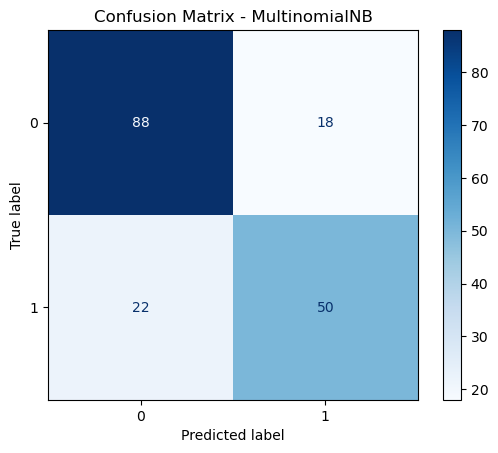

In [87]:
multinomial_nb = MultinomialNB(alpha=1.0)
evaluate_naive_bayes(multinomial_nb, X_train_scaled, X_test_scaled, y_train, y_test, "MultinomialNB")

### accuracy: 0.78

BernoulliNB Performance:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       106
           1       0.73      0.74      0.73        72

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



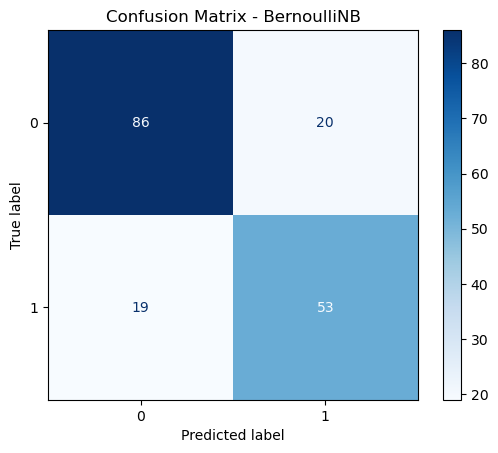

In [88]:
bernoulli_nb = BernoulliNB(alpha=1.0)
evaluate_naive_bayes(bernoulli_nb, X_train_scaled, X_test_scaled, y_train, y_test, "BernoulliNB")


### accuracy: 0.78

### bernoulli_nb is the best model for naive bayes

In [91]:
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Gamma parameter (only used for RBF and Poly kernels)
    'kernel': ['linear', 'poly', 'rbf']  # Different kernels to experiment with
}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']})

In [92]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [93]:
best_params

{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

### best_params {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [94]:
best_score

0.8305563879732294

Best SVM Model (Tuned) Performance:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       106
           1       0.75      0.60      0.67        72

    accuracy                           0.76       178
   macro avg       0.76      0.73      0.74       178
weighted avg       0.76      0.76      0.75       178



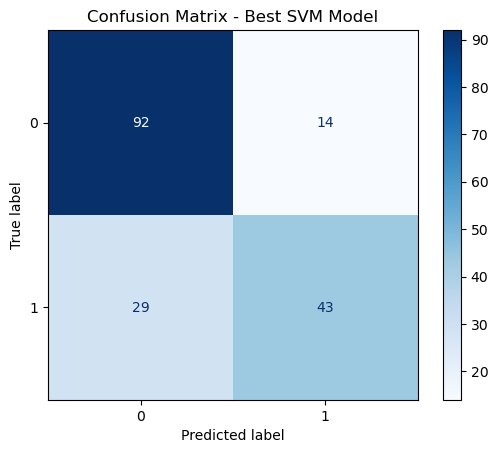

In [95]:
best_svm = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_svm.predict(X_test)

# Evaluate the performance of the best model
print(f"Best SVM Model (Tuned) Performance:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_svm.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Best SVM Model")
plt.show()

### accuracy 0.76

In [96]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt_tune = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(dt_tune, param_grid)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]})

In [97]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [98]:
best_params

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

### best_params {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [99]:
best_score 

0.8305963440215762

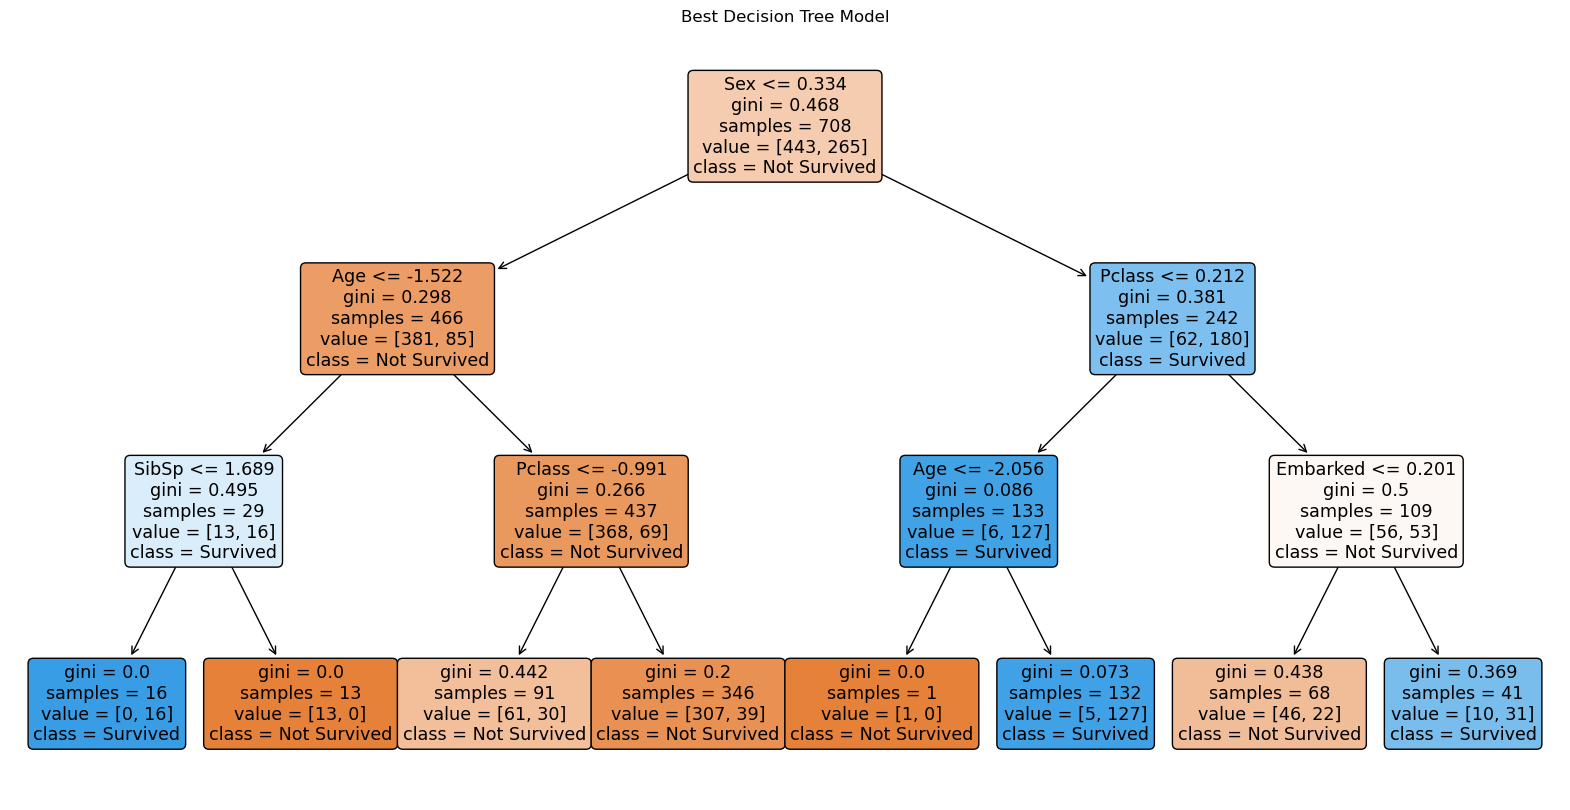

In [100]:
best_dt = grid_search.best_estimator_

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.title("Best Decision Tree Model")
plt.show()

Best Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       106
           1       0.80      0.56      0.66        72

    accuracy                           0.76       178
   macro avg       0.78      0.73      0.74       178
weighted avg       0.77      0.76      0.75       178



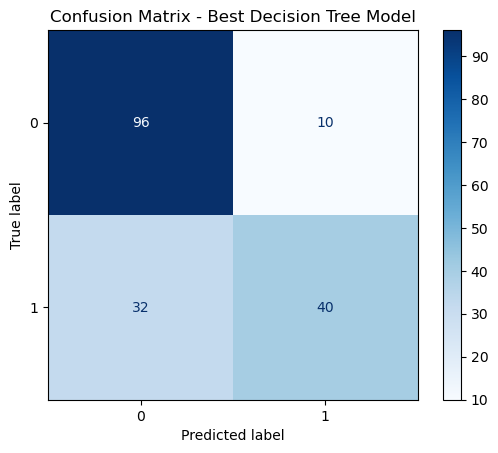

In [102]:
print(f"Best Decision Tree Model Performance:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_dt.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Best Decision Tree Model")
plt.show()

### accuracy                           0.76

# the best 2 models depending on the acc is 

# KNN and bernoulli_nb

### since bernoulli_nb is better at categorical data and binary data and knn has higher recall and precision 
### KNN is the best model for our dataset